# Exploratory Data Analysis for Machine Learning
## Peer Review Project 1

This project uses the publically available **Breast Cancer Wisconsin (Diagnostic) Data set** hosted on Kaggle 

[https://www.kaggle.com/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34.


---

I intend to apply the steps taught in the last 2 weeks ie;

1. Data retrieval
2. Data cleaning (removing/imputing missing values and outliers if present)
3. Checking features using plots/ visualisations
4. Feature engineering such as transformations for linear regression modelling
5. Hypothesis testing for features that are associated with Benign vs Malignant tissue

### Module Imports

In [16]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


### Importing the data

In [2]:
# Importing the data
filepath = "data.csv"
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### For purposes of prediction, unique features such as the ID will not be useful and can be dropped

In [4]:
df1 = df.copy()
df1.drop('id',axis=1,inplace=True)
df1.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

### Since there aren't any missing values or cateogorical variables other than the diagnosis in the dataset, we can look at some basic descriptive statistics

In [5]:
df1.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   
Unnamed: 32                0.0         NaN         NaN         NaN   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.40000

### Whew, that's a lot of data. Maybe a pair plot with diagnosis as the hue can tell us more. Since the variables are so many, let's use only 6 of them for now.

In [6]:
smaller_df = df1.loc[:,['diagnosis','perimeter_mean','compactness_mean','concavity_mean','radius_mean','area_mean','texture_mean']]
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis         569 non-null    object 
 1   perimeter_mean    569 non-null    float64
 2   compactness_mean  569 non-null    float64
 3   concavity_mean    569 non-null    float64
 4   radius_mean       569 non-null    float64
 5   area_mean         569 non-null    float64
 6   texture_mean      569 non-null    float64
dtypes: float64(6), object(1)
memory usage: 31.2+ KB


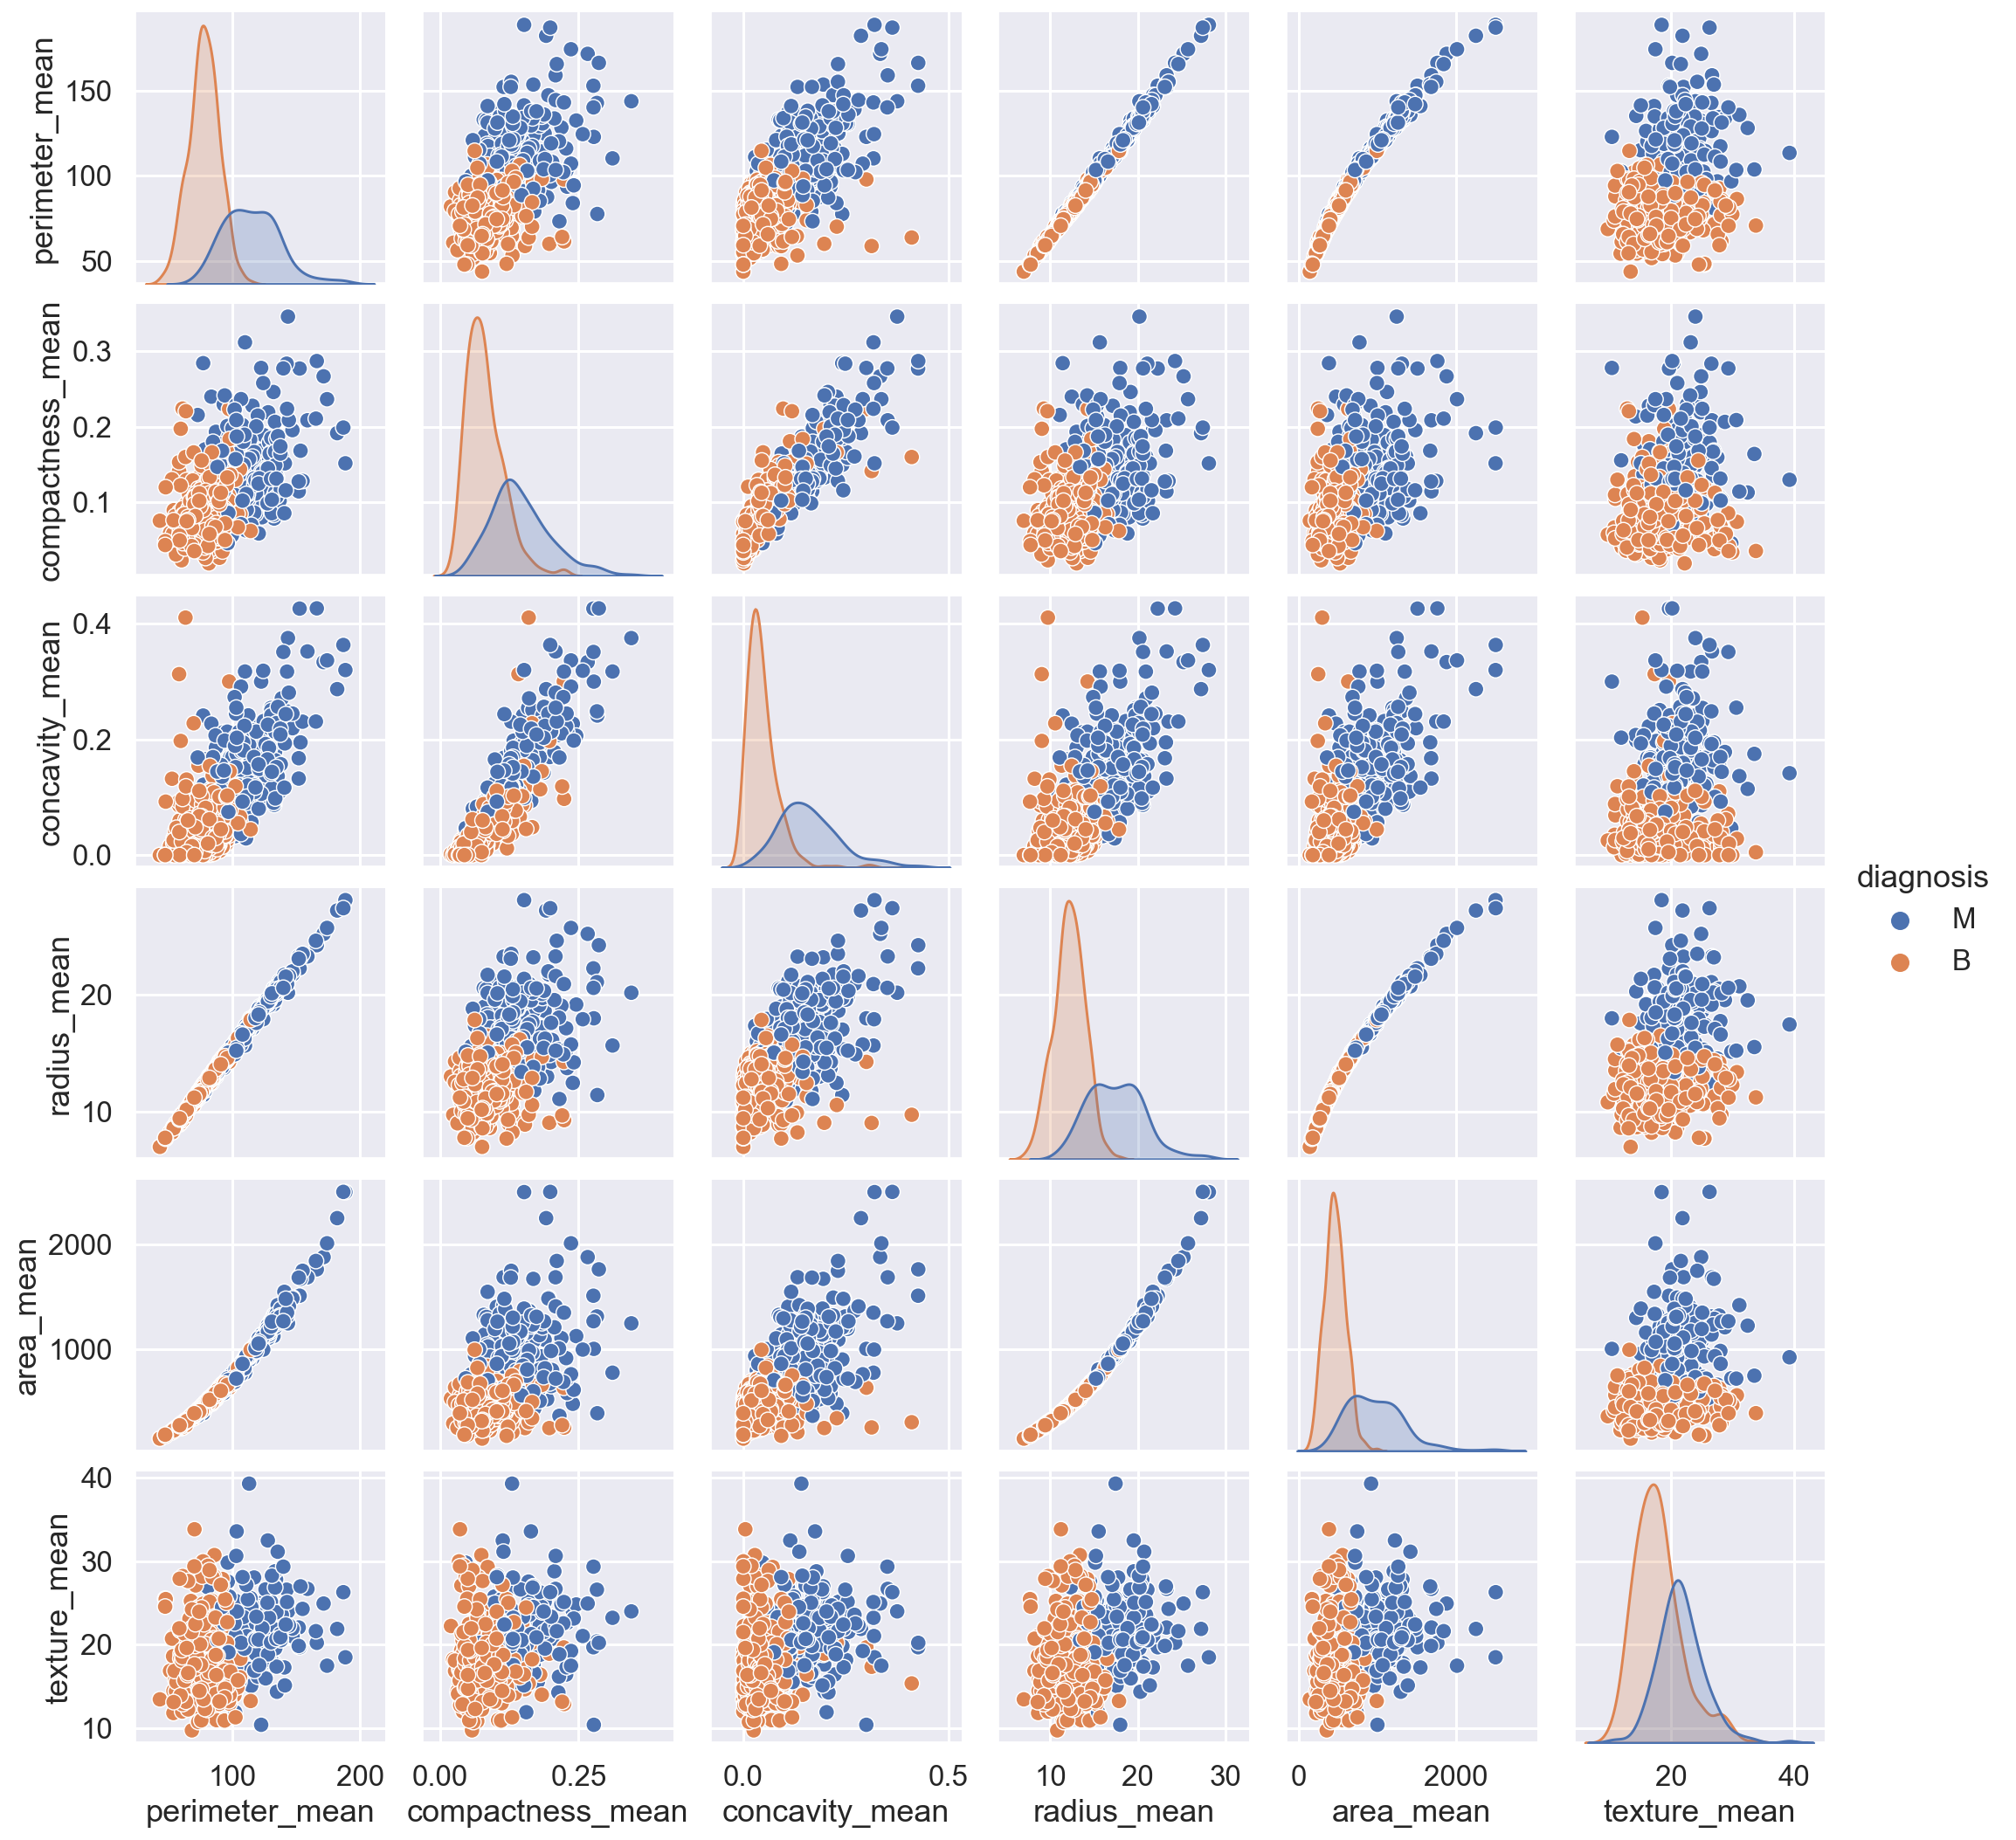

In [7]:
sns.set_context('talk')
sns.pairplot(smaller_df, hue='diagnosis')

### There seems to be a linear relationship between dimensions and the diagnosis of the cancer. That would be an interesting hypothesis to test. 
### But we need to engineer these features into a normal distribution for linear regression modelling

In [8]:
# Check for skewed distributions before hypothesis testing
skew_vals = smaller_df.skew()
skew_limit = 0.75 # define a limit above which we will log transform


In [9]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
area_mean         1.645732
concavity_mean    1.401180
compactness_mean  1.190123
perimeter_mean    0.990650
radius_mean       0.942380

### All features except texture are skewed. So we shall apply Log transformation to them before hypothesis testing

Text(0.5, 0.98, 'Field "area_mean"')

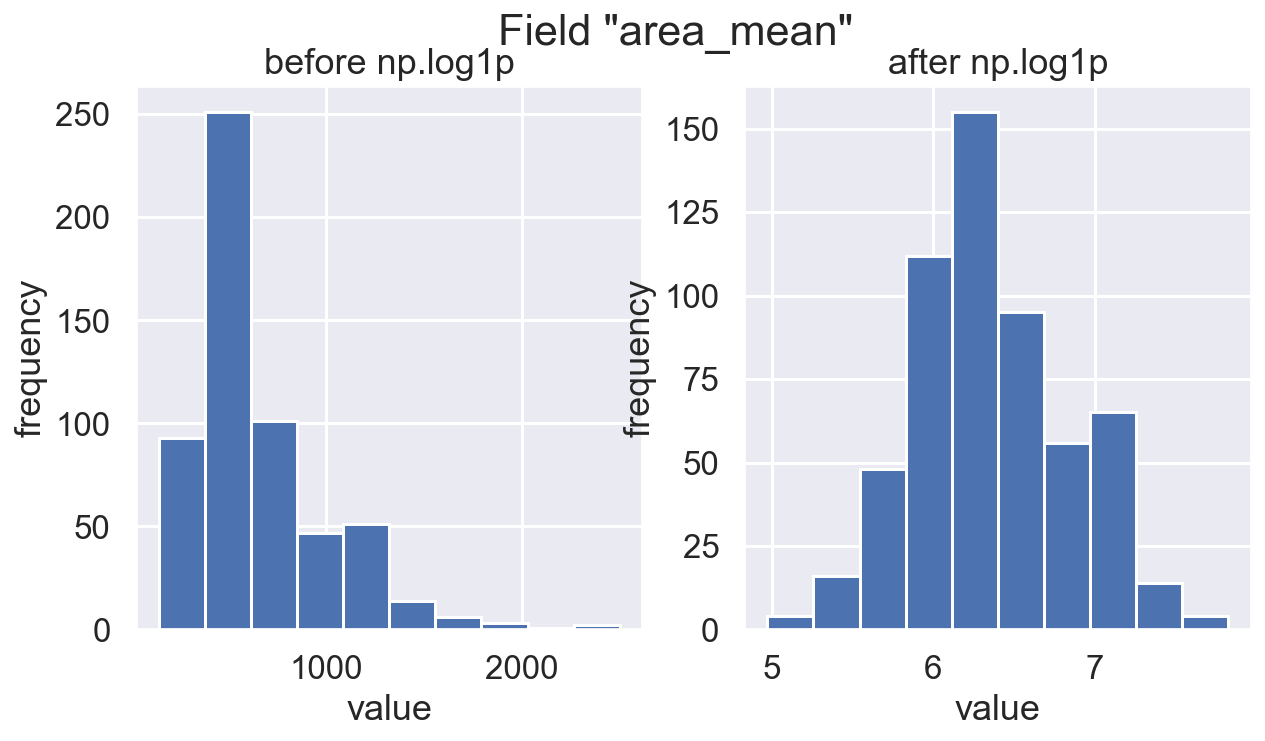

In [10]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "area_mean"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [11]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "diagnosis":
        continue
    smaller_df[col] = smaller_df[col].apply(np.log1p)

In [12]:
smaller_df.head()

diagnosis  perimeter_mean  compactness_mean  concavity_mean  radius_mean  \
0         M        4.818667          0.244983        0.262441     2.943913   
1         M        4.897093          0.075701        0.083330     3.071303   
2         M        4.875197          0.148334        0.180153     3.029650   
3         M        4.364117          0.249902        0.216240     2.519308   
4         M        4.913390          0.124692        0.180653     3.058237   

   area_mean  texture_mean  
0   6.909753         10.38  
1   7.190676         17.77  
2   7.093405         21.25  
3   5.958683         20.38  
4   7.168580         14.34

In [13]:
smaller_df.describe().T

count       mean       std       min        25%        50%  \
perimeter_mean    569.0   4.500683  0.248328  3.801985   4.332968   4.468663   
compactness_mean  569.0   0.098145  0.046646  0.019195   0.062900   0.088588   
concavity_mean    569.0   0.082552  0.070113  0.000000   0.029132   0.059721   
radius_mean       569.0   2.691235  0.222226  2.077064   2.541602   2.665143   
area_mean         569.0   6.365109  0.482274  4.973280   6.043345   6.313729   
texture_mean      569.0  19.289649  4.301036  9.710000  16.170000  18.840000   

                        75%        max  
perimeter_mean     4.654912   5.244389  
compactness_mean   0.122572   0.296691  
concavity_mean     0.122837   0.355434  
radius_mean        2.820188   3.371082  
area_mean          6.664026   7.824846  
texture_mean      21.800000  39.280000

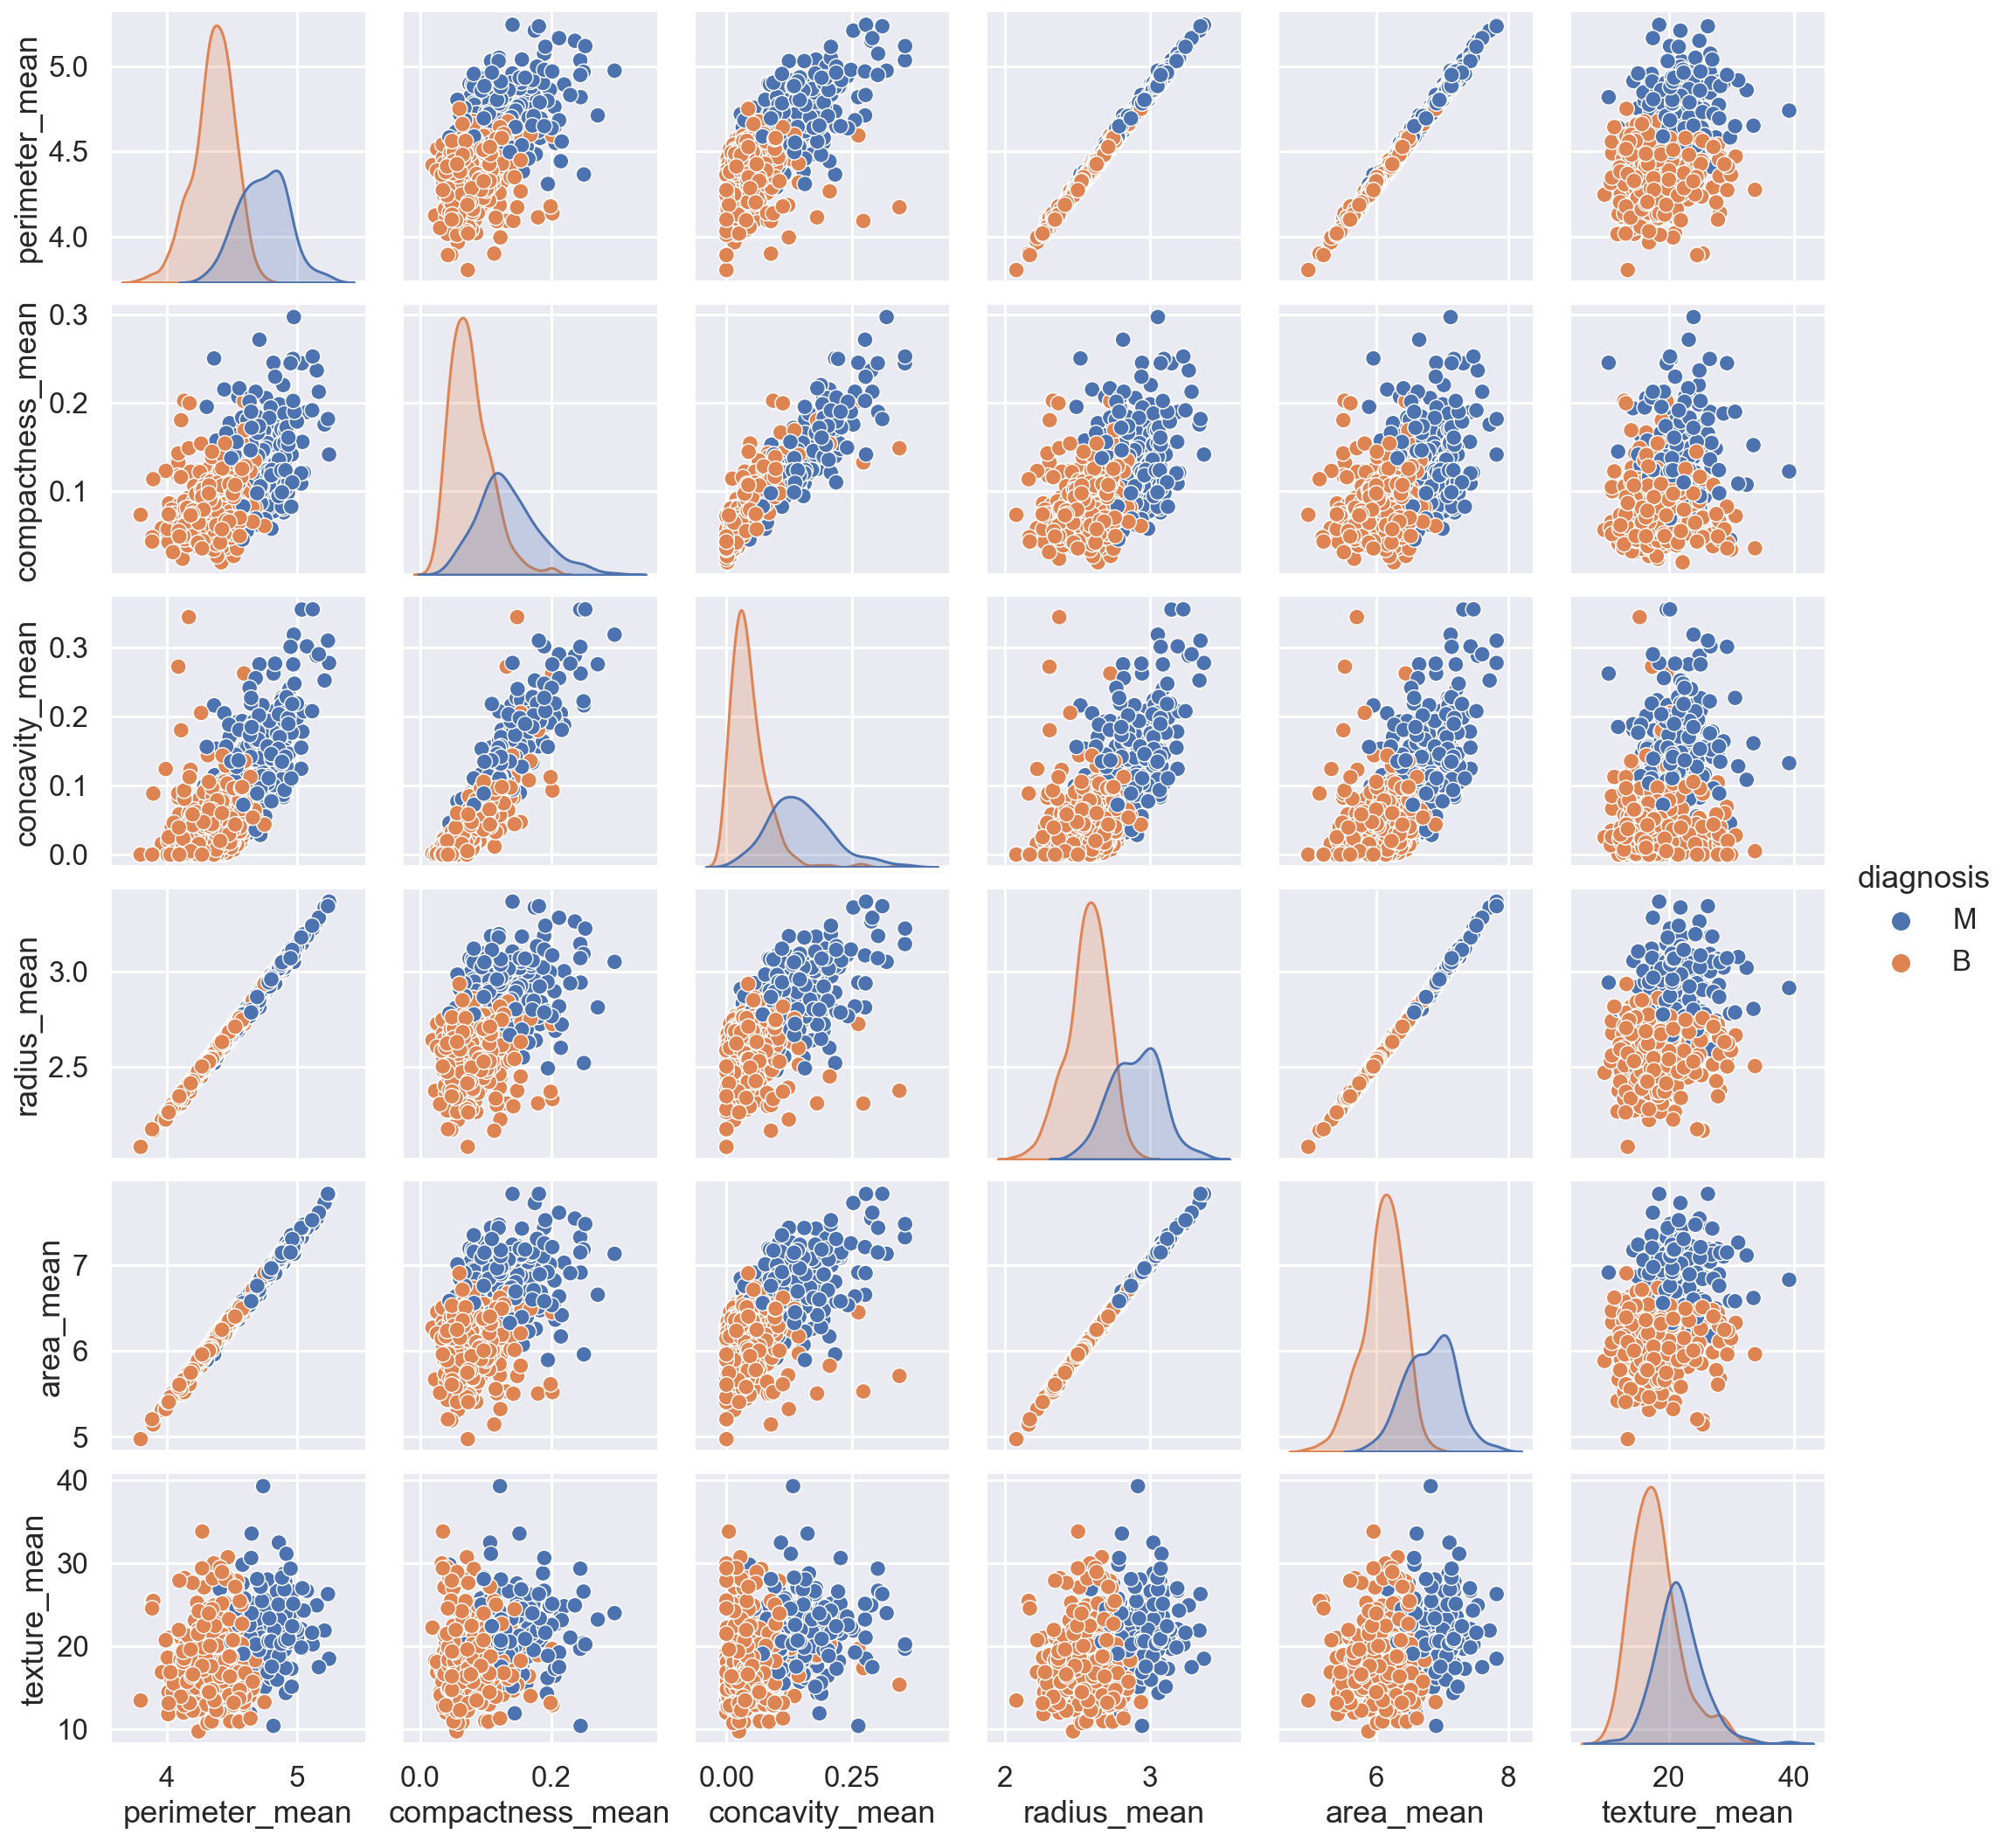

In [14]:
# Checking to see how the feature engineering has improved the distribution of attributes
sns.pairplot(smaller_df, hue='diagnosis')

### Hypothesis testing

#### Ho - Nuclei with a perimeter mean greater than 4.5 are not malignant
#### H1 - Nuclei with a permieter mean greater than 4.5 are malignant

In [19]:
# To test this hypothesis, we shall carry out a t-test on the two diagnoses

from scipy.stats import ttest_ind

mal = smaller_df[smaller_df['diagnosis'] == 'M']
ben = smaller_df[smaller_df['diagnosis'] == 'B']

ttest_ind(mal['perimeter_mean'],ben['perimeter_mean'])

Ttest_indResult(statistic=26.35462190815133, pvalue=1.5372483643273375e-100)

#### Such a low p-value leads us to fail to reject the null hypothesis. 

Thank you!